In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

# HOME DIRECTION 'C:/Users/ERIC/Desktop/T_S_Analysis/PML HISTÓRICO PARA EL NODO 01OTM-230 (OTUMBA MANIOBRAS) (1).xlsm'
# ORCA 'C:/Users/Operaciones F/T_S_Analysis'
data_mondays = pd.read_excel('C:/Users/ERIC/Desktop/T_S_Analysis/PML HISTÓRICO PARA EL NODO 01OTM-230 (OTUMBA MANIOBRAS) (1).xlsm', 2)

# ALL DATA
data_mondays = pd.DataFrame(data_mondays)
# DATA FROM 2017
data_17 = data_mondays.iloc[:, 1:25].values
data_17 = pd.DataFrame(data_17)

# DATA FROM 2018
data_18 = data_mondays.iloc[:, 26:50].values
data_18 = pd.DataFrame(data_18)

# DATA FROM 2019
data_19 = data_mondays.iloc[:, 51:75].values
data_19 = pd.DataFrame(data_19)
# DATA FROM 2019
data_20 = data_mondays.iloc[:, 76:100].values
data_20 = pd.DataFrame(data_20)

# AUTOCORRELATION FOR ALL THE HOURS, ALL MONDAYS IN THE 3 YEARS
# Autocorrelation & Augmented Fuller
# Run the ADF test on the price series and print out the results

#  Autocorrelation DATA 2020
data_20 = data_20.dropna()
autocorr_u = []
for i in range(24):
    autocorr_u.append(data_20[i].autocorr())
autocorr_u = pd.DataFrame(autocorr_u)
autocorr_u.columns = ['Autocorrelation']

# Augmented dickey fuller test data 2020
results_af = []
for i in range(24):
    res = adfuller(data_20[i])
    results_af.append(res[1])
results_af = pd.DataFrame(results_af)   
results_af.columns = ['ADF P-value']

# Autocorrelation Difference btwn DATA 2020
autocorr_diff = []
daily_diff = data_20.diff()
daily_diff = daily_diff.dropna()
for i in range(24):
    autocorr_diff.append(daily_diff[i].autocorr())

autocorr_diff = pd.DataFrame(autocorr_diff)
autocorr_diff.columns = ['AC Diff']

# Augmentes Dickey Fuller test difference btwn data 2020
results_af_diff = []
diff = data_20.diff()
diff = diff.dropna()
for i in range(24):
    data_ret = diff[i].pct_change()
    data_ret = data_ret.dropna()
    res_diff = adfuller(data_ret)
    results_af_diff.append(res_diff[1])
results_af_diff = pd.DataFrame(results_af_diff)   
results_af_diff.columns = ['ADF Diff [P-value]']
'''
# achieving stationarity w/ log function at the difference in the raw 2020 data and testing
autocorr_diff_log = []
daily_diff_log = np.log(daily_diff)
daily_diff_log =daily_diff_log.dropna()
for i in range(24):
    autocorr_diff_log.append(daily_diff_log[i].autocorr())

autocorr_diff_log = pd.DataFrame(autocorr_diff_log)
autocorr_diff_log.columns = ['AC Diff log()']

results_af_diff_log = []
diff_log = np.log(diff)
diff_log = diff_log.dropna()
for i in range(24):
    data_ret_log = diff_log[i].pct_change()
    data_ret_log = data_ret.dropna()
    res_diff_log = adfuller(data_ret_log)
    results_af_diff_log.append(res_diff_log[1])
results_af_diff_log = pd.DataFrame(results_af_diff_log)   
results_af_diff_log.columns = ['ADF Diff Log [P-value]']
'''
# achieving stationarity w/ log function and testing
data_20_log = np.log(data_20)
data_20_log = data_20_log.dropna()

#autocorrelation
autocorr_u_log = []
for i in range(24):
    autocorr_u_log.append(data_20_log[i].autocorr())
autocorr_u_log = pd.DataFrame(autocorr_u_log)
autocorr_u_log.columns = ['AC Log']
#Augmented dickey fuller test
results_af_log = []
for i in range(24):
    res_log = adfuller(data_20_log[i])
    results_af_log.append(res_log[1])
results_af_log = pd.DataFrame(results_af_log)   
results_af_log.columns = ['ADF Log() [P-value]']

# achieving stationarity w/ the differennce of the data gotten from log function and testing
data_20_log_diff = data_20_log.diff()
data_20_log_diff = data_20_log_diff.dropna()

#autocorrelation
autocorr_u_log_diff = []
for i in range(24):
    autocorr_u_log_diff.append(data_20_log_diff[i].autocorr())
autocorr_u_log_diff = pd.DataFrame(autocorr_u_log_diff)
autocorr_u_log_diff.columns = ['AC Log Diff']
#Augmented dickey fuller test
results_af_log_diff = []
for i in range(24):
    res_log_diff = adfuller(data_20_log_diff[i])
    results_af_log_diff.append(res_log_diff[1])
results_af_log_diff = pd.DataFrame(results_af_log_diff)   
results_af_log_diff.columns = ['ADF Log() Diff [P-value]']


#Positive autocorrelation = Momentum // Negative = Mean reverted
# In ADFuller if p<0.05 we can reject the hypothesis that series is a random walk

autocorr_log = pd.concat([autocorr_u, autocorr_diff, autocorr_u_log, autocorr_u_log_diff, results_af, results_af_diff, results_af_log, results_af_log_diff], axis = 1)
autocorr_log = autocorr_log.round(4)
'''
mod = ARMA(data_20[0], order = (4,0))
res = mod.fit()

print(res.summary())
res.plot_predict(start=0, end=52)
plt.show()

resp = res.predict(start=0, end=10)
resp = pd.DataFrame(resp)
resp2 = resp.iloc[0:52, ].values
resp2 = pd.DataFrame(resp2)
resp2

plt.plot(data_20[0], label=2020)
plt.plot(resp2, label='PRONÓSTICO')
plt.legend(loc=1)
plt.show()

# Analyze every p from the raw data, its difference, its log function, its difference in log f data
autocorr_log    
autocorrelation_data =  []
for i in range(24):
    autocorrelation_data.append(pacf(data_20_log[i], method ="ywmle", nlags = 8))
autocorrelation_data = pd.DataFrame(autocorrelation_data)
autocorrelation_data
resultados_bic = []
for i in range(24):
    resultados_bic.append([])
    for p in range(4):
        mod_ar = ARMA(data_20_log[i], order = (p,0))
        res = mod_ar.fit(method = 'css')
        #resultados_aic.append(res.aic)
        resultados_bic[i].append(res.bic)      
resultados_bic = pd.DataFrame(resultados_bic)
resultados_bic_plot = resultados_bic.T
resultados_bic_plot
for i in range(0,24):
    resultados_bic_plot[i].plot(marker='o')
    plt.xlabel('Order of AR Model---Hour: '+ str(i+1))
    plt.ylabel('Bayesian Information Criterion')
    plt.show()
'''
autocorr_log


,Autocorrelation,AC Diff,AC Log,AC Log Diff,ADF P-value,ADF Diff [P-value],ADF Log() [P-value],ADF Log() Diff [P-value]
0,-0.1206,-0.2079,-0.1187,-0.2012,0.0969,0.0202,0.1027,0.0000
1,-0.0893,-0.4613,-0.0933,-0.4717,0.0442,0.1583,0.0441,0.0010
2,-0.2309,-0.5695,-0.1874,-0.5403,0.0072,0.0709,0.0155,0.0001
3,-0.1131,-0.4441,-0.0636,-0.4408,0.0289,0.9483,0.0491,0.0013
4,-0.2022,-0.5404,-0.1549,-0.5179,0.0109,0.1002,0.0233,0.0003
5,-0.0284,-0.4215,-0.0658,-0.4589,0.0714,0.3216,0.0546,0.0013
6,-0.0793,-0.5010,-0.0972,-0.4985,0.0496,0.0953,0.0435,0.0006
7,-0.3499,-0.6380,-0.2476,-0.5764,0.0029,0.0000,0.0107,0.0001
8,-0.3237,-0.5903,-0.2313,-0.5555,0.0043,0.2913,0.0130,0.0001
9,-0.3703,-0.6163,-0.3735,-0.6110,0.0022,0.0972,0.0022,0.0000


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   10
Model:                     ARMA(2, 0)   Log Likelihood                  12.028
Method:                       css-mle   S.D. of innovations              0.071
Date:                Fri, 13 Mar 2020   AIC                            -16.056
Time:                        15:23:06   BIC                            -14.845
Sample:                             0   HQIC                           -17.384
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9391      0.016    381.773      0.000       5.909       5.970
ar.L1.y       -0.1304      0.387     -0.337      0.736      -0.889       0.628
ar.L2.y       -0.4606      0.326     -1.414      0.1

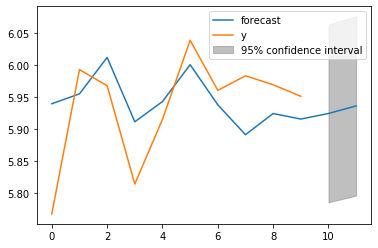

0     5.939144
1     5.954536
2     6.011573
3     5.910898
4     5.942548
5     6.000183
6     5.937437
7     5.890706
8     5.923829
9     5.915145
10    5.923928
11    5.935773
dtype: float64

In [74]:
mod = ARMA(data_20_log[0], order = (2,0))
res = mod.fit()
print(res.summary())

res.plot_predict(start=0, end=11)
plt.show()

'''
#ESTIMATING AN ARMA MODEL
mod_ar1 = ARMA(data_20_log[0], order = (2,0))
res1 =mod_ar1.fit()
mod_ar2 = ARMA(data_20_log[0], order = (0,2))
res2 = mod_ar2.fit()
print("AIC ARMA(2,0): ",res1.aic , "\nAIC ARMA(0,2) ", res2.aic )
'''
res.predict(start=0, end=11)

                              ARMA Model Results                              
Dep. Variable:                      1   No. Observations:                   10
Model:                     ARMA(1, 0)   Log Likelihood                  -1.037
Method:                       css-mle   S.D. of innovations              0.268
Date:                Fri, 13 Mar 2020   AIC                              8.074
Time:                        15:33:33   BIC                              8.982
Sample:                             0   HQIC                             7.078
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7860      0.079     73.380      0.000       5.631       5.941
ar.L1.1       -0.0849      0.301     -0.282      0.778      -0.674       0.505
                                    Roots           

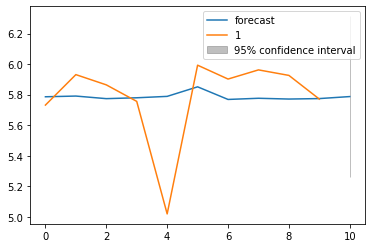

0     5.786039
1     5.790660
2     5.773736
3     5.779424
4     5.788602
5     5.851123
6     5.768495
7     5.776199
8     5.771107
9     5.774174
10    5.787336
dtype: float64

In [76]:
mod = ARMA(data_20_log[1], order = (1,0))
res = mod.fit()
print(res.summary())

res.plot_predict(start=0, end=10)
plt.show()
res.predict(start=0, end=10)

                              ARMA Model Results                              
Dep. Variable:                      2   No. Observations:                   10
Model:                     ARMA(0, 1)   Log Likelihood                  -3.940
Method:                       css-mle   S.D. of innovations              0.357
Date:                Fri, 13 Mar 2020   AIC                             13.880
Time:                        15:46:46   BIC                             14.787
Sample:                             0   HQIC                            12.884
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6584      0.083     68.520      0.000       5.497       5.820
ma.L1.2       -0.3022      0.491     -0.615      0.539      -1.265       0.661
                                    Roots           

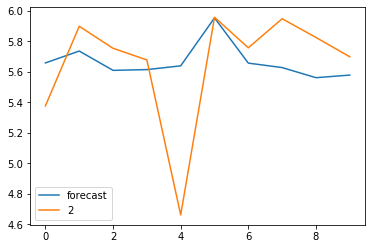

0    5.658367
1    5.736282
2    5.609693
3    5.614703
4    5.639286
5    5.953689
6    5.657100
7    5.627975
8    5.561624
9    5.578670
dtype: float64

In [85]:
mod = ARMA(data_20_log[2], order = (1,0))
res = mod.fit()
print(res.summary())

res.plot_predict(start=0, end=9)
plt.show()
res.predict(start=0, end=9)

                              ARMA Model Results                              
Dep. Variable:                      3   No. Observations:                   10
Model:                     ARMA(1, 0)   Log Likelihood                  -4.856
Method:                       css-mle   S.D. of innovations              0.393
Date:                Fri, 13 Mar 2020   AIC                             15.712
Time:                        15:50:35   BIC                             16.620
Sample:                             0   HQIC                            14.717
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5995      0.118     47.349      0.000       5.368       5.831
ar.L1.3       -0.0587      0.306     -0.192      0.848      -0.658       0.541
                                    Roots           

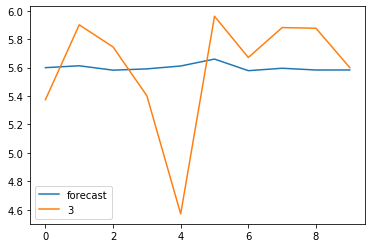

0    5.599544
1    5.612778
2    5.581858
3    5.591001
4    5.611146
5    5.659921
6    5.578320
7    5.595344
8    5.583002
9    5.583274
dtype: float64

In [86]:
mod = ARMA(data_20_log[3], order = (1,0))
res = mod.fit()
print(res.summary())

res.plot_predict(start=0, end=9)
plt.show()
res.predict(start=0, end=9)

                              ARMA Model Results                              
Dep. Variable:                      4   No. Observations:                   10
Model:                     ARMA(1, 0)   Log Likelihood                  -5.752
Method:                       css-mle   S.D. of innovations              0.430
Date:                Fri, 13 Mar 2020   AIC                             17.505
Time:                        15:51:56   BIC                             18.412
Sample:                             0   HQIC                            16.509
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6212      0.120     46.700      0.000       5.385       5.857
ar.L1.4       -0.1442      0.303     -0.476      0.634      -0.738       0.450
                                    Roots           

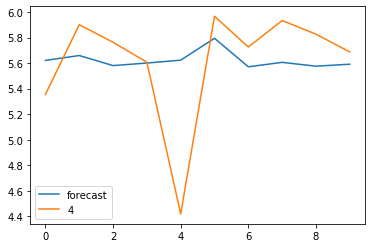

0    5.621179
1    5.659613
2    5.580799
3    5.600671
4    5.623217
5    5.794608
6    5.571262
7    5.606055
8    5.576091
9    5.591525
dtype: float64

In [87]:
mod = ARMA(data_20_log[4], order = (1,0))
res = mod.fit()
print(res.summary())

res.plot_predict(start=0, end=9)
plt.show()
res.predict(start=0, end=9)